# Imports

In [161]:
import pandas as pd 
import numpy  as np

import matplotlib.pyplot as plt
import seaborn           as sns 

from sklearn.linear_model    import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics         import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing   import StandardScaler
from sklearn.ensemble        import RandomForestRegressor, GradientBoostingRegressor

# Loading Data

In [162]:
real_df = pd.read_csv('kc_house_data.csv')
real_df['date'] = pd.to_datetime(real_df['date'])
real_df.shape

(21613, 21)

In [163]:
real_df.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,2014-10-13 00:00:00,2014-12-09 00:00:00,2015-02-25 00:00:00,2014-12-09 00:00:00,2015-02-18 00:00:00
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,0,0,0,0,0
view,0,0,0,0,0


In [164]:
real_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [165]:
real_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# EDA 

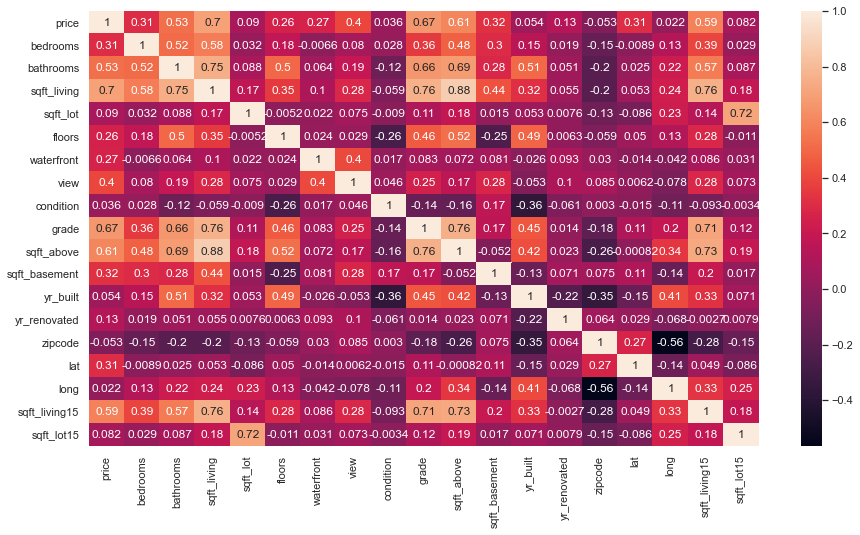

In [166]:
# Correlations between features and target
sns.set(rc={'figure.figsize':(15,8)})
corr = real_df.iloc[:,1:].corr()
sns.heatmap(corr, annot=True)
plt.show()

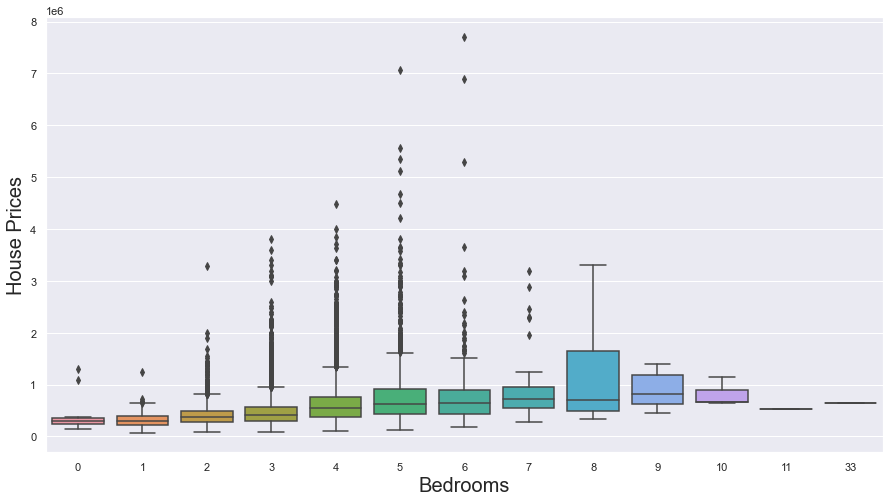

In [167]:
# Does the number of bedrooms affects the price of a house?
sns.boxplot(x='bedrooms', y='price', data=real_df)
plt.xlabel('Bedrooms', fontsize=20)
plt.ylabel('House Prices', fontsize=20)
plt.show()

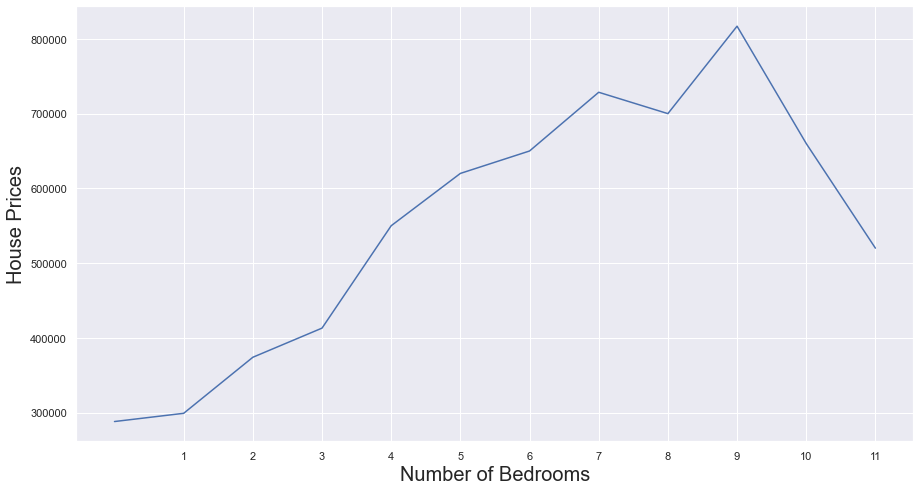

In [168]:
# Number of bedrooms X Median price 
bedxprice = real_df[['bedrooms','price']].groupby('bedrooms').median().iloc[:-1,:]
plt.plot(bedxprice.index, bedxprice['price'])
plt.xticks([*range(1,12)])
plt.xlabel('Number of Bedrooms', fontsize=20)
plt.ylabel('House Prices', fontsize=20)
plt.show()

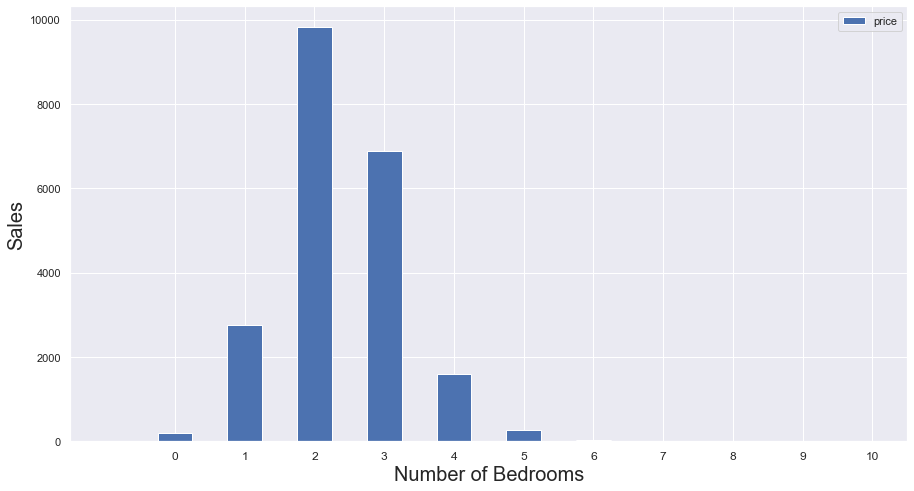

In [169]:
# Number of Houses Saled based on number of bedrooms
bedXsales = real_df[['bedrooms','price']].groupby('bedrooms').count().iloc[:-1,:]
bedXsales.plot.bar()
plt.xticks([*range(1,12)], rotation=0, fontsize=12)
plt.xlabel('Number of Bedrooms', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.show()

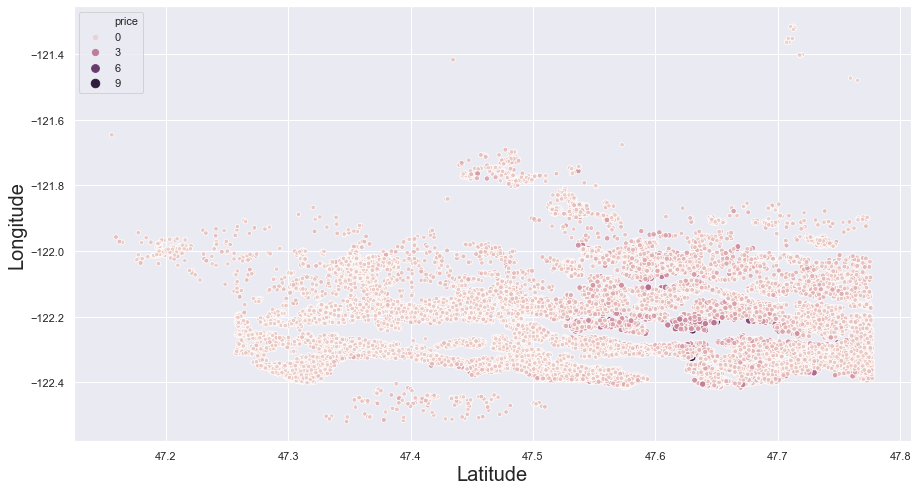

In [170]:
# Influence of locality in the price
latxlong = real_df[['lat','long','price','waterfront']]
sns.scatterplot(x='lat',y='long',data=latxlong, size='price', hue='price')
plt.xlabel('Latitude', fontsize=20)
plt.ylabel('Longitude', fontsize=20)
plt.show()

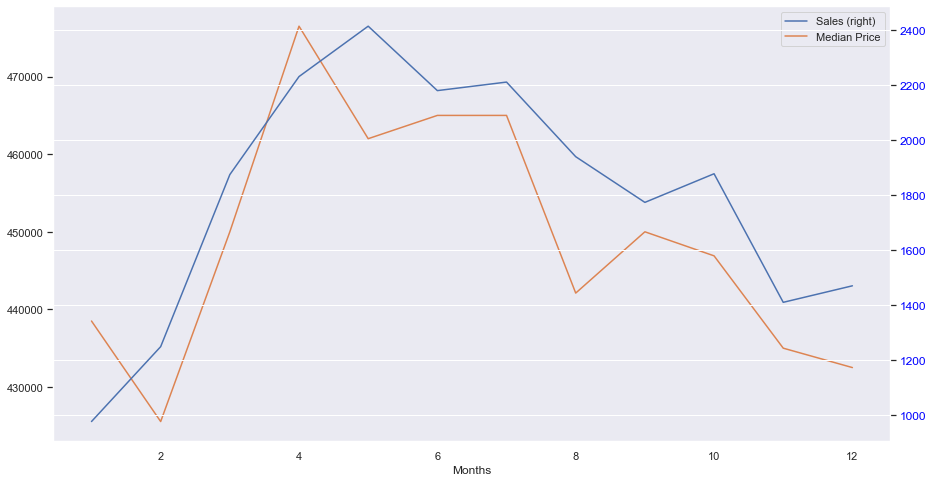

In [171]:
# Dynamic of number of house sales and price of house during the year
datexcount = real_df[['date', 'price']].rename(columns={'price':'Sales', 'date':'Months'}).set_index('Months')
datexcount = datexcount.groupby(datexcount.index.month).count()

datexprice = real_df[['date', 'price']].rename(columns={'price':'Median Price', 'date':'Months'}).set_index('Months')
datexprice = datexprice.groupby(datexprice.index.month).median()

df_full = datexcount.join(datexprice)
df_full.plot(secondary_y=['Sales'])

plt.xticks(fontsize=15)
plt.yticks(fontsize=12, color='blue')
plt.xlabel('Months',fontsize=20) 
plt.show()

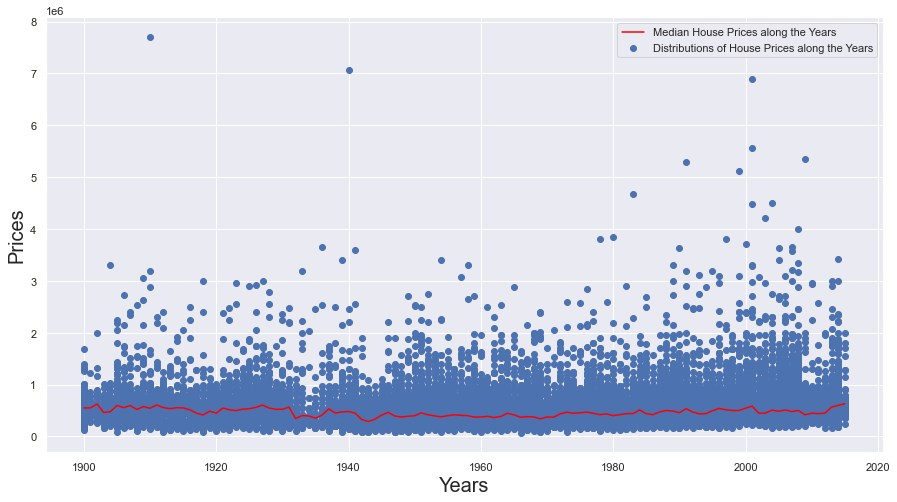

In [172]:
# Newest houses are more expensive?
yearXprice = real_df[['yr_built', 'price']].groupby('yr_built').median()
plt.scatter(real_df['yr_built'], real_df['price'], label='Distributions of House Prices along the Years')
plt.plot(yearXprice.index, yearXprice['price'], color='red', label='Median House Prices along the Years')
plt.ylabel('Prices', fontsize=20)
plt.xlabel('Years', fontsize=20)
plt.legend()
plt.show()

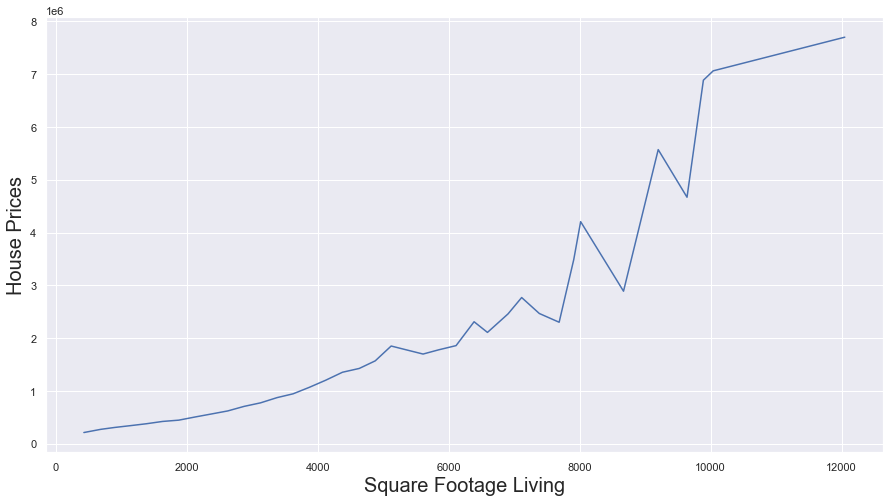

In [173]:
# Correlation between Square Footage Living and House Price 
livingXprice = real_df[['sqft_living', 'price']]
livingXprice = livingXprice.groupby(pd.cut(livingXprice["sqft_living"], np.arange(0, max(livingXprice['sqft_living']), 250))).mean()
sns.lineplot('sqft_living', 'price', data=livingXprice)
plt.ylabel('House Prices', fontsize=20)
plt.xlabel('Square Footage Living', fontsize=20)
plt.show()

# Data Preparation 

In [174]:
# Split data
X = real_df.drop(['date', 'price','id'], axis=1)
y = real_df['price']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Model Training - Linear Models

In [175]:
# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train,y_train)

# Lasso Regression
lasso = Lasso(alpha=0.8, normalize=True)
lasso.fit(X_train,y_train)

# Ridge Regression
ridge = Ridge(alpha=0.8, normalize=True)
ridge.fit(X_train,y_train)

Ridge(alpha=0.8, normalize=True)

lasso coefficients: [-3.40219448e+04  4.00854745e+04  1.51785686e+02  9.03468698e-02
  5.03630711e+03  5.43222798e+05  5.50620496e+04  2.30100634e+04
  9.49592674e+04  3.23081195e+01  0.00000000e+00 -2.58759586e+03
  2.18194535e+01 -5.51052871e+02  5.94488699e+05 -1.95314584e+05
  1.60571053e+01 -3.17608294e-01]


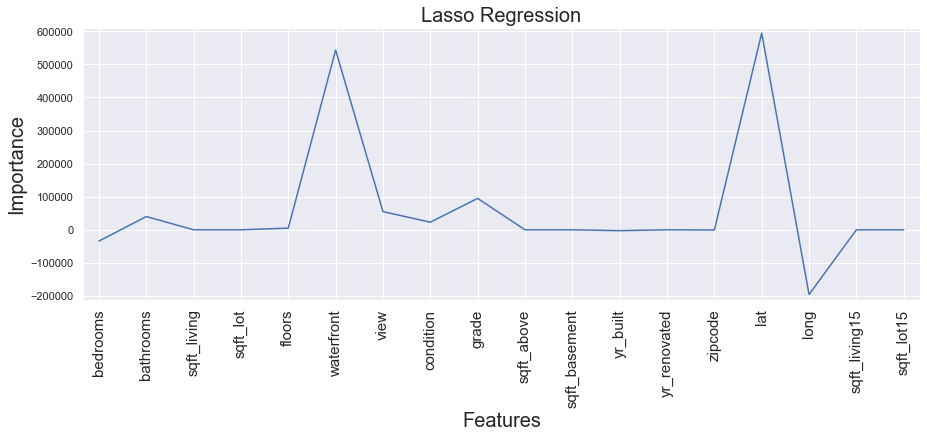

In [176]:
# lasso coefficients
lasso_coef = lasso.coef_
print('lasso coefficients:', lasso_coef)

# Plot coefficients
sns.set(rc={'figure.figsize':(15,5)})
plt.plot(range(len(X_train.columns)), lasso_coef)
plt.xticks(range(len(X_train.columns)), X_train.columns.values, rotation=60)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Importance',fontsize=20)
plt.xticks(rotation = 90, fontsize=15)
plt.title('Lasso Regression',fontsize=20)
plt.margins(0.02)
plt.show()

# Performance Metrics - Linear Models

In [180]:
# Absolute Error and Absolute error percentual (ae_aep)
def ae_aep(data):
    data['abs_error'] = round(np.abs(data['price'] - data['predict']), 2)
    data['abs_error_perc'] = round(np.abs(data['price'] - data['predict']) / data['price'] *100, 2)
    
    return data

# Mean Absolute Error (MAE)
def mae(data):
    mae = np.sum(data['abs_error'])/len(data['abs_error'])
    
    return round(mae, 2)

# Mean Absoulute Percentual Error (MAPE)
def mape(data):
    mape = np.mean(data['abs_error_perc'])
    
    return round(mape, 2)

In [181]:
#                                               TEST METRICS
# Predict
pred_linreg = linreg.predict(X_test)
pred_lasso  = lasso.predict(X_test)
pred_ridge  = ridge.predict(X_test)

# Df for metrics 
df_linreg = pd.DataFrame({'price': y_test, 'predict': pred_linreg})
df_lasso  = pd.DataFrame({'price': y_test, 'predict': pred_lasso})
df_ridge  = pd.DataFrame({'price': y_test, 'predict': pred_ridge})
ae_aep(df_linreg)
ae_aep(df_lasso)
ae_aep(df_ridge)


print('LinReg MAE: ', mae(df_linreg),
     '  Lasso MAE: ',  mae(df_lasso),
     '  Ridge MAE: ',  mae(df_ridge)
     )

print('LinReg MAPE:', mape(df_linreg),
'      Lasso MAPE:',  mape(df_lasso),
'      Ridge MAPE:',  mape(df_ridge)
     )

print(  'LinReg R^2: ', round(linreg.score(X_test, y_test), 2),
 '       Lasso R^2: ',  round(lasso.score(X_test, y_test), 2),
'        Ridge R^2: ',  round(ridge.score(X_test, y_test), 2)
     )

print('LinReg RMSE:', round(np.sqrt(mean_squared_error(y_test, pred_linreg)), 2),
    '  Lasso RMSE:',  round(np.sqrt(mean_squared_error(y_test, pred_lasso)), 2),
    '  Ridge RMSE:',  round(np.sqrt(mean_squared_error(y_test, pred_ridge)), 2)
     )

LinReg MAE:  127486.8   Lasso MAE:  127452.64   Ridge MAE:  130783.94
LinReg MAPE: 25.3       Lasso MAPE: 25.29       Ridge MAPE: 25.21
LinReg R^2:  0.7        Lasso R^2:  0.7         Ridge R^2:  0.64
LinReg RMSE: 208296.73   Lasso RMSE: 208323.26   Ridge RMSE: 228287.15


# Model Training - Random Forest

In [182]:
# Hyperparameters to search
param_grid = {'max_depth': [8,10, 15], 'max_features': [8,10, 15], 'random_state': [42]}

# Find the best hyperparameters
rfr = RandomForestRegressor(n_estimators=200)
clf = GridSearchCV(rfr, param_grid, cv=5)
clf.fit(X_train, y_train)

print("Tuned Random Forest Regression Parameters: {}".format(clf.best_params_)) 
print("Best score is {}".format(clf.best_score_))

Tuned Random Forest Regression Parameters: {'max_depth': 15, 'max_features': 8, 'random_state': 42}
Best score is 0.878851714987341


# Performance Metrics - Random Forest

In [183]:
# Predict
pred_randfor = clf.predict(X_test)

# Df for metrics
df_randfor = pd.DataFrame({'price': y_test, 'predict': pred_randfor})
ae_aep(df_randfor)

print('Random Forest MAE: ', mae(df_randfor))
print('Random Forest MAPE:', mape(df_randfor))
print('Random Forest R^2: ', round(clf.score(X_test, y_test), 2))
print('Random Forest RMSE:', round(np.sqrt(mean_squared_error(y_test, pred_randfor)), 2))

Random Forest MAE:  73990.6
Random Forest MAPE: 13.61
Random Forest R^2:  0.86
Random Forest RMSE: 144552.95


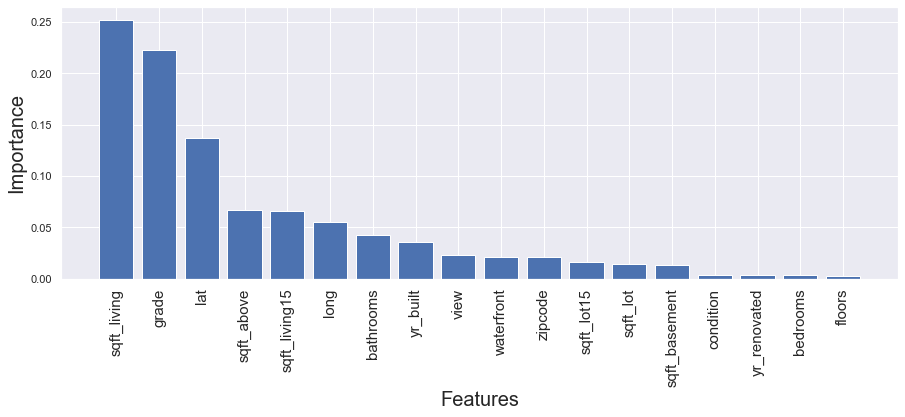

In [184]:
# Get feature importances 
rfr = RandomForestRegressor(n_estimators=200, max_depth= 15, max_features= 8, random_state = 42)
rfr.fit(X_train, y_train)
importances = rfr.feature_importances_

sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))


labels = np.array(X_test.columns)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Importance', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.show()

# Model Training - Gradient Boosting

In [185]:
# GradientBoost model 
gbr = GradientBoostingRegressor(max_features=8,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)
gbr.fit(X_train, y_train)

print('Gradient Boosting R2 - Train:', gbr.score(X_train, y_train))
print('Gradient Boosting R2 - Test:',  gbr.score(X_test, y_test))

Gradient Boosting R2 - Train: 0.7582691106140398
Gradient Boosting R2 - Test: 0.7267492135561464


# Performance Metrics - Gradient Boosting

In [186]:
# Predict
pred_gradboost = clf.predict(X_test)

# Df for metrics
df_gradboost = pd.DataFrame({'price': y_test, 'predict': pred_gradboost})
ae_aep(df_gradboost)

print('Random Forest MAE: ', mae(df_gradboost))
print('Random Forest MAPE:', mape(df_gradboost))
print('Random Forest R^2: ', round(gbr.score(X_test, y_test), 2))
print('Random Forest RMSE:', round(np.sqrt(mean_squared_error(y_test, pred_gradboost)), 2))

Random Forest MAE:  73990.6
Random Forest MAPE: 13.61
Random Forest R^2:  0.73
Random Forest RMSE: 144552.95


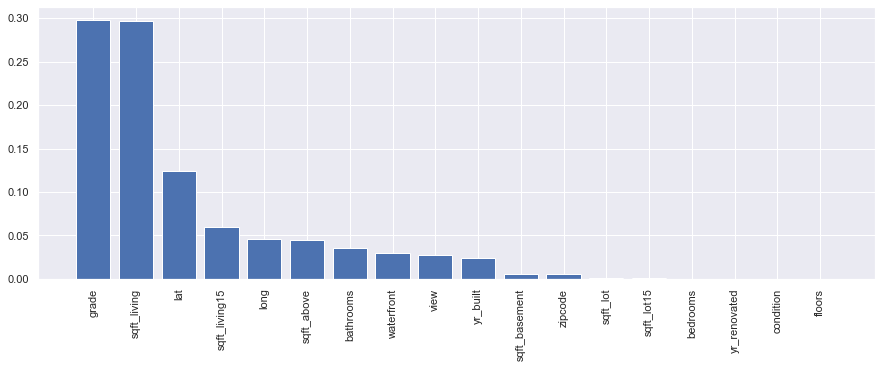

In [187]:
# Extract feature importances 
feature_importances = gbr.feature_importances_
sorted_index = np.argsort(feature_importances)[::-1]
x = range(len(feature_importances))
labels = np.array(X_test.columns)[sorted_index]
plt.bar(x, feature_importances[sorted_index], tick_label=labels)
plt.xticks(rotation=90)
plt.show()

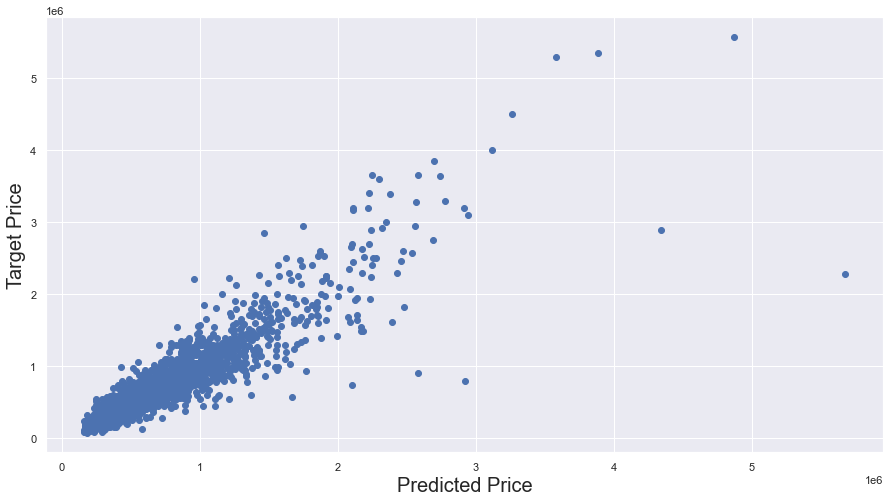

In [192]:
sns.set(rc={'figure.figsize':(15,8)})
df_gradboost['bedrooms'], df_gradboost['sqft_living'] = X_test['bedrooms'], X_test['sqft_living']
plt.scatter(df_gradboost['predict'], df_gradboost['price'])
plt.xlabel('Predicted Price', fontsize=20)
plt.ylabel('Target Price', fontsize=20)
plt.show()